<a href="https://colab.research.google.com/github/booluckgmie/training/blob/main/Scrape_Kutbah_Jumaat_JAIS_2011_current.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# the base url and the page parameter
base_url = 'http://e-masjid.jais.gov.my/index.php/ekhutbah'
page_param = '?page='

# create an empty list to store the results
khutbah_list = []

# loop through all the pages (1 to 228)
for i in range(1, 2):
    # make a request to the page
    response = requests.get(base_url + page_param + str(i))
    # parse the html content with BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    # find the table with id "pemohon"
    table = soup.find('table', {'id': 'pemohon'})
    # loop through all the rows in the table (except the header row)
    for row in table.find_all('tr')[1:]:
        # extract the data from each cell
        cells = row.find_all('td')
        bil = cells[0].text.strip()
        tarikh = cells[1].text.strip()
        tajuk = cells[2].text.strip()
        versi = cells[3].text.strip()
        fail = cells[4].find('a')['href'].strip()
        # create a dictionary of the data
        khutbah = {
            'bil': bil,
            'tarikh': tarikh,
            'tajuk': tajuk,
            'versi': versi,
            'fail': fail
        }
        # add the dictionary to the list
        khutbah_list.append(khutbah)

# print the results
# for khutbah in khutbah_list:
    # print(khutbah)

df = pd.DataFrame(khutbah_list)
df['fail'] = df['fail'].str[2:]
prefix = 'http://e-masjid.jais.gov.my/'
df['fail'] = df['fail'].apply(lambda x: prefix + x)
df

,bil,tarikh,tajuk,versi,fail
0,1,07-04-2023,HIKMAH BULAN RAMADHAN,Rumi,http://e-masjid.jais.gov.my//uploads/uploads/0...
1,2,07-04-2023,HIKMAH BULAN RAMADHAN,Jawi,http://e-masjid.jais.gov.my//uploads/uploads/0...
2,3,07-04-2023,THE WISDOM OF RAMADAAN,English,http://e-masjid.jais.gov.my//uploads/uploads/H...
3,4,07-04-2023,THE WISDOM OF RAMADAAN,Multimedia,http://e-masjid.jais.gov.my//uploads/uploads/H...
4,5,07-04-2023,THE WISDOM OF RAMADAAN PDF,Multimedia,http://e-masjid.jais.gov.my//uploads/uploads/S...
5,6,07-04-2023,HIKMAH BULAN RAMADAN,Manual,http://e-masjid.jais.gov.my//uploads/uploads/M...
6,7,07-04-2023,HIKMAH BULAN RAMADAN,Multimedia,http://e-masjid.jais.gov.my//uploads/uploads/H...
7,8,07-04-2023,HIKMAH BULAN RAMADAN PDF,Multimedia,http://e-masjid.jais.gov.my//uploads/uploads/S...
8,9,31-03-2023,PUASA MENINGKATKAN KETAKWAAN UMAT ISLAM,Rumi,http://e-masjid.jais.gov.my//uploads/uploads/3...
9,10,31-03-2023,PUASA MENINGKATKAN KETAKWAAN UMAT ISLAM,Jawi,http://e-masjid.jais.gov.my//uploads/uploads/3...


In [30]:
import os

# Create folders for BM and English PDFs
if not os.path.exists('BM'):
    os.makedirs('BM')
if not os.path.exists('English'):
    os.makedirs('English')

# Filter the DataFrame to only include rows where VERSI KHUTBAH is 'Rumi' or 'English'
df_filtered = df[df['versi'].isin(['Rumi', 'English'])]

# Iterate over the rows in the filtered DataFrame
for index, row in df_filtered.iterrows():
    # Check if the 'Fail Khutbah' column contains a PDF link
    if '.pdf' in row['fail']:
        # Download the PDF file and save it to disk
        pdf_url = row['fail']
        response = requests.get(pdf_url)
        # Extract the language from the 'versi' column
        language = row['versi']
        # Create a filename based on the 'tarikh', 'tajuk', and 'versi' columns
        filename = f"{row['tarikh']}_{row['tajuk']}_{row['versi']}.pdf"
        # Save the file to the appropriate folder
        if language == 'Rumi':
            folder = 'English'
        else:
            folder = 'BM'
        with open(os.path.join(folder, filename), 'wb') as f:
            f.write(response.content)


## Output

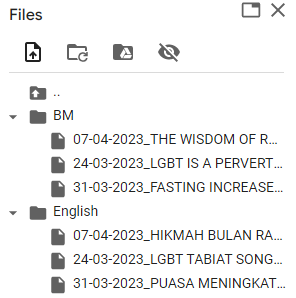